In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/cmw/Downloads/mission_launches.csv'
data = pd.read_csv(file_path)

data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [30]:
# Check for data types and missing values
print("Data Types and Missing Values:\n", data.info())

# Summary statistics of numerical features
print("\nSummary Statistics:\n", data.describe())

# Check for missing values in each column
print("\nMissing Values in Each Column:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB
Data Types and Missing Values:
 None

Summary Statistics:
        Organisation                                    Location  \
count          4324                                        4324   
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   

                              Date                           

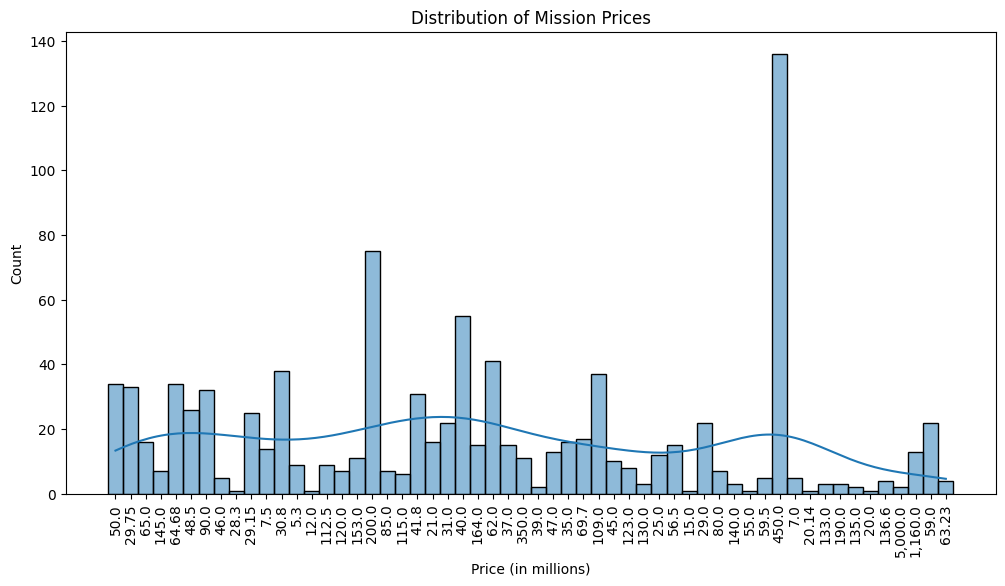

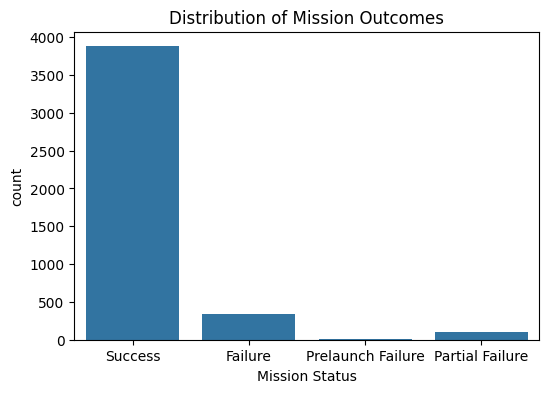

In [31]:
# Plot the distribution of mission prices
plt.figure(figsize=(12, 6))
sns.histplot(data['Price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Mission Prices')
plt.xlabel('Price (in millions)')
plt.xticks(rotation=90)
plt.show()

# Plot distribution of mission outcomes
plt.figure(figsize=(6, 4))
sns.countplot(x='Mission_Status', data=data)
plt.title('Distribution of Mission Outcomes')
plt.xlabel('Mission Status')
plt.show()

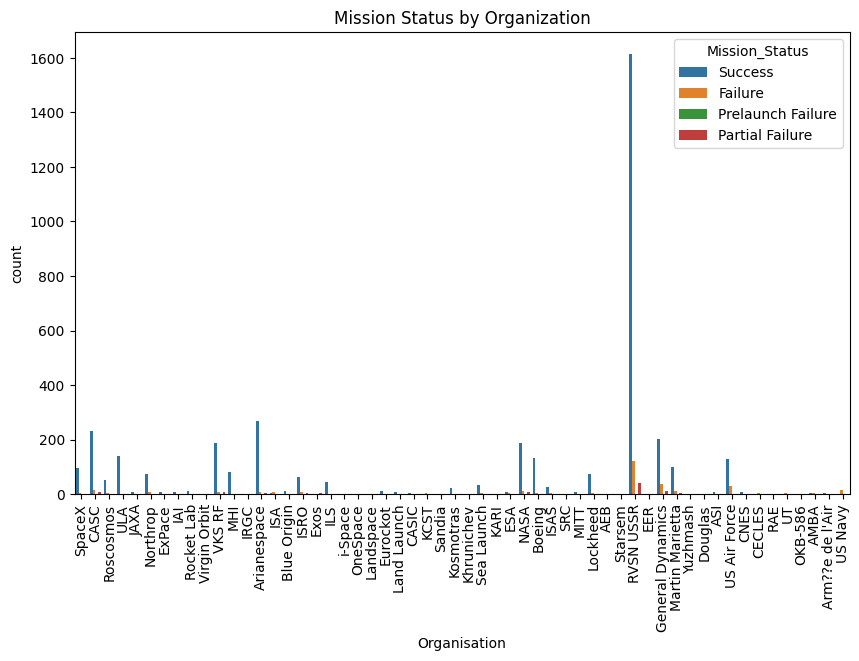

In [32]:
# Analyze the impact of the organization on mission outcomes
plt.figure(figsize=(10, 6))
sns.countplot(x='Organisation', hue='Mission_Status', data=data)
plt.title('Mission Status by Organization')
plt.xticks(rotation=90)
plt.show()

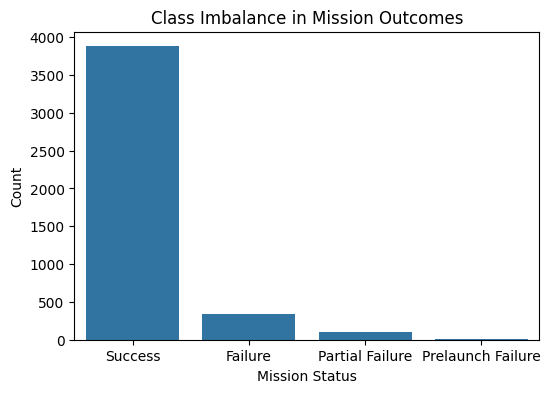

In [33]:
# Check for class imbalance in the target variable
mission_status_counts = data['Mission_Status'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=mission_status_counts.index, y=mission_status_counts.values)
plt.title('Class Imbalance in Mission Outcomes')
plt.xlabel('Mission Status')
plt.ylabel('Count')
plt.show()

Correlation between Price and Mission Success: 0.05


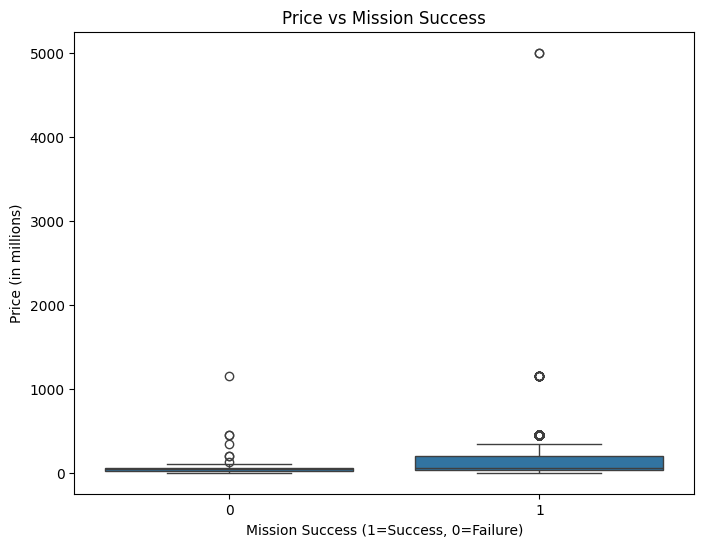

In [35]:
if 'Price' in data.columns:
    data['Price'] = data['Price'].replace({',': ''}, regex=True).astype(float)

# Convert 'Mission_Status' to a binary variable: 1 for Success, 0 for Failure
data['Mission_Success'] = data['Mission_Status'].apply(lambda x: 1 if x == 'Success' else 0)

# Correlation between Price and Mission Success
price_success_corr = data[['Price', 'Mission_Success']].corr().iloc[0, 1]
print(f"Correlation between Price and Mission Success: {price_success_corr:.2f}")

# Visualize the relationship between Price and Mission Success
plt.figure(figsize=(8, 6))
sns.boxplot(x='Mission_Success', y='Price', data=data)
plt.title('Price vs Mission Success')
plt.xlabel('Mission Success (1=Success, 0=Failure)')
plt.ylabel('Price (in millions)')
plt.show()


In [20]:
# Convert the Date column to datetime format
data['Launch_Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract year, month, and day of the week from the launch date
data['Launch_Year'] = data['Launch_Date'].dt.year
data['Launch_Month'] = data['Launch_Date'].dt.month
data['Launch_DayOfWeek'] = data['Launch_Date'].dt.day_name()

# Plot mission success rates by year
plt.figure(figsize=(10, 6))
sns.countplot(x='Launch_Year', hue='Mission_Status', data=data)
plt.title('Mission Outcomes by Launch Year')
plt.xticks(rotation=90)
plt.show()

# Plot mission success rates by month
plt.figure(figsize=(8, 6))
sns.countplot(x='Launch_Month', hue='Mission_Status', data=data)
plt.title('Mission Outcomes by Launch Month')
plt.show()

# Plot mission success rates by day of the week
plt.figure(figsize=(8, 6))
sns.countplot(x='Launch_DayOfWeek', hue='Mission_Status', data=data)
plt.title('Mission Outcomes by Day of the Week')
plt.xticks(rotation=45)
plt.show()

KeyError: 'Date'

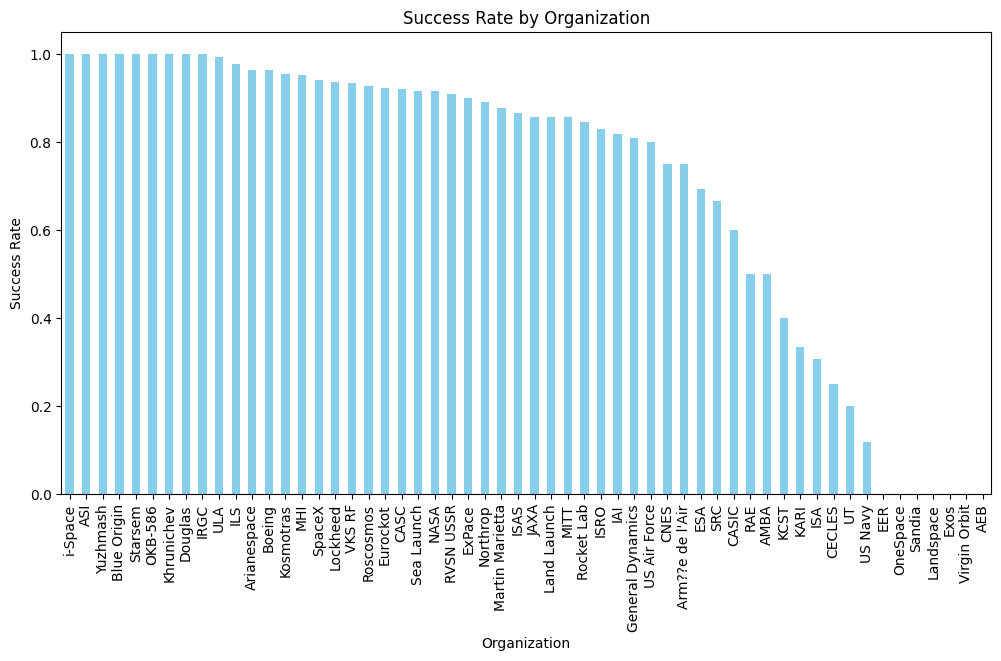

In [21]:
# Calculate success rate for each organization
organization_success_rate = data.groupby('Organisation')['Mission_Success'].mean().sort_values(ascending=False)

# Plot success rates by organization
plt.figure(figsize=(12, 6))
organization_success_rate.plot(kind='bar', color='skyblue')
plt.title('Success Rate by Organization')
plt.ylabel('Success Rate')
plt.xlabel('Organization')
plt.xticks(rotation=90)
plt.show()

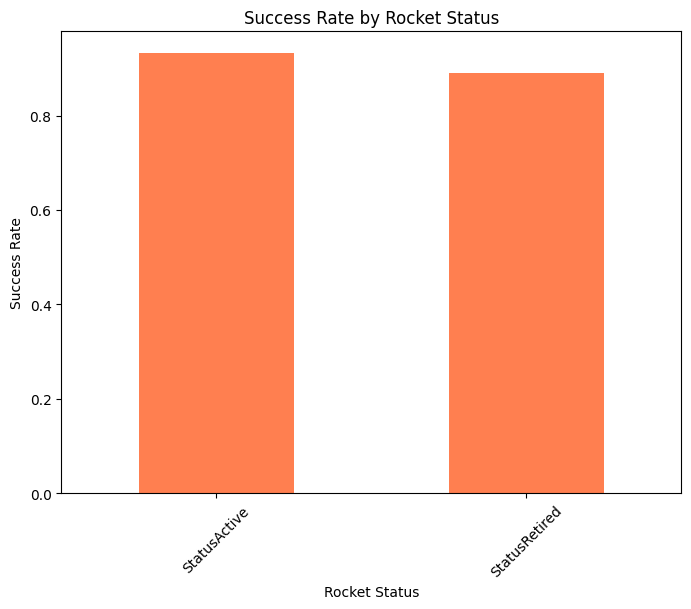

In [22]:
# Calculate success rate by rocket status
rocket_status_success_rate = data.groupby('Rocket_Status')['Mission_Success'].mean().sort_values(ascending=False)

# Plot success rates by rocket status
plt.figure(figsize=(8, 6))
rocket_status_success_rate.plot(kind='bar', color='coral')
plt.title('Success Rate by Rocket Status')
plt.ylabel('Success Rate')
plt.xlabel('Rocket Status')
plt.xticks(rotation=45)
plt.show()